# Import dependencies

In [145]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

# Functions

In [146]:
def plot_region(df, regione):
    df_regione = df[df["denominazione_regione"] == regione]
    province = list(df_regione["denominazione_provincia"].unique())
    
    plt.rcParams.update({"legend.fontsize": "x-large",
                         "figure.figsize": (20, 15),
                         'xtick.labelsize': 10})
    ax = plt.gca()
    formatter = mdates.DateFormatter("%m-%d")
    ax.xaxis.set_major_formatter(formatter)
    locator = mdates.DayLocator()
    ax.xaxis.set_major_locator(locator)

    for i in range(len(province)):
        query = 'denominazione_provincia == "{}"'.format(province[i])
        df_provincia = df_regione.query(query)
        
        data = df_provincia["data"].values
        totale_casi = df_provincia["totale_casi"].values
        plt.plot(data, totale_casi, label=province[i])
    
    query = "denominazione_regione == '{}'".format(regione)
    totale_casi = (df.query(query)
                   .groupby(["data"])["totale_casi"]
                   .sum().values)
    plt.plot(data, totale_casi, label="Totale %s" % regione)
    
    plt.legend(loc="upper left")
    plt.show()    

# Load data

In [147]:
dati_province_fpath = "../../dati-province/dpc-covid19-ita-province.csv"
df = pd.read_csv(dati_province_fpath, sep=",")

In [148]:
df.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
0,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,NaN,NaN
1,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,NaN,NaN
2,2020-02-24T18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,NaN,NaN
3,2020-02-24T18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,NaN,NaN
4,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,0.000000,0.000000,0,NaN,NaN


## Coverti data: string to datetime object

In [149]:
df.loc[:, "data"] = df.loc[:, "data"].apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%S"))

In [150]:
df.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
0,2020-02-24 18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,NaN,NaN
1,2020-02-24 18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,NaN,NaN
2,2020-02-24 18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,NaN,NaN
3,2020-02-24 18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,NaN,NaN
4,2020-02-24 18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,0.000000,0.000000,0,NaN,NaN


# Totale per regione

In [151]:
df_totale_regione = (df[ df["data"] == df["data"].max() ]
                     .groupby(["denominazione_regione"], as_index=False)["totale_casi"].sum()
                     .sort_values(["totale_casi"], ascending=[False])) 

In [152]:
df_totale_regione

,denominazione_regione,totale_casi
8,Lombardia,41007
4,Emilia Romagna,13119
20,Veneto,8358
13,Piemonte,8206
17,Toscana,4122
9,Marche,3558
7,Liguria,3076
6,Lazio,2706
3,Campania,1759
12,P.A. Trento,1594


In [153]:
df_totale_regione["totale_casi"].sum()

97689

## Senza Lombardia

In [154]:
df_totale_regione = (df[ (df["data"] == df["data"].max()) & 
                         (df["denominazione_regione"] != "Lombardia") ]
                     .groupby(["denominazione_regione"], as_index=False)["totale_casi"].sum()
                     .sort_values(["totale_casi"], ascending=[False])) 

In [155]:
df_totale_regione["totale_casi"].sum()

56682

# Andamento Lombardia

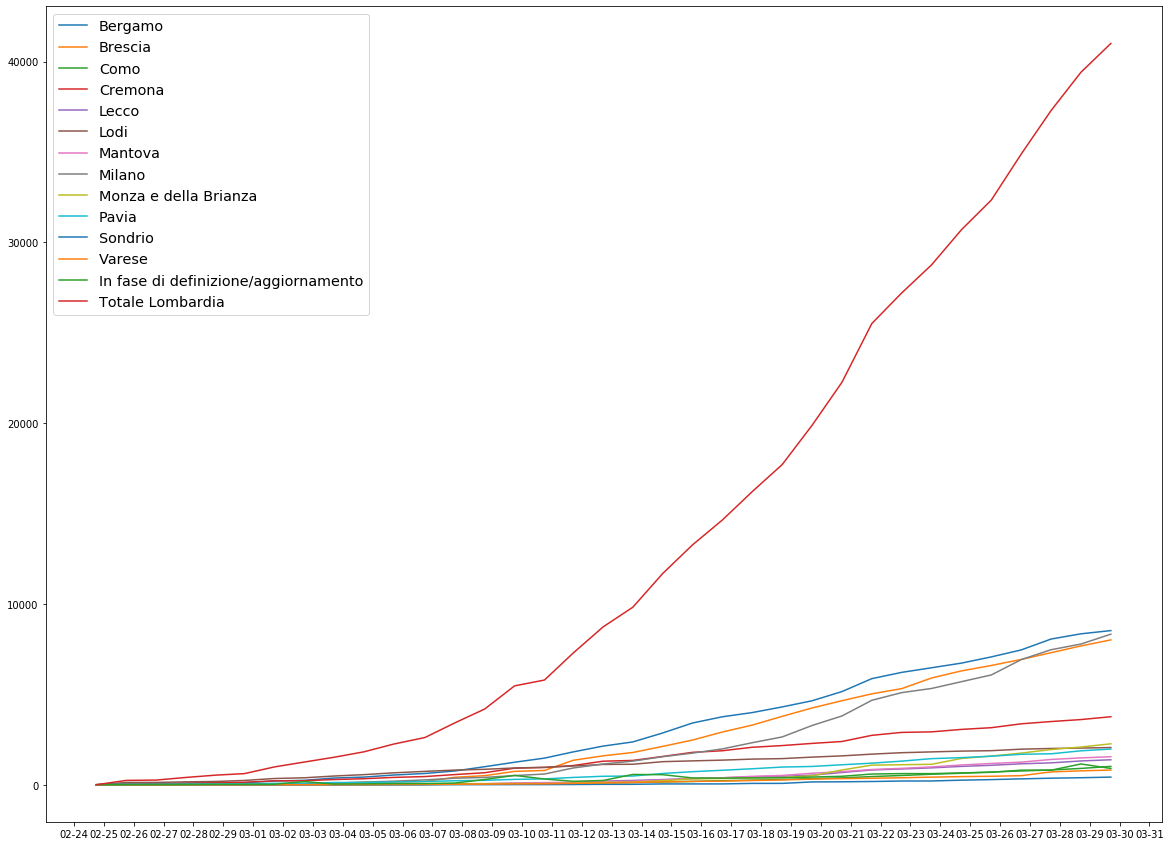

In [156]:
plot_region(df, "Lombardia")

# Andamento Emilia Romagna

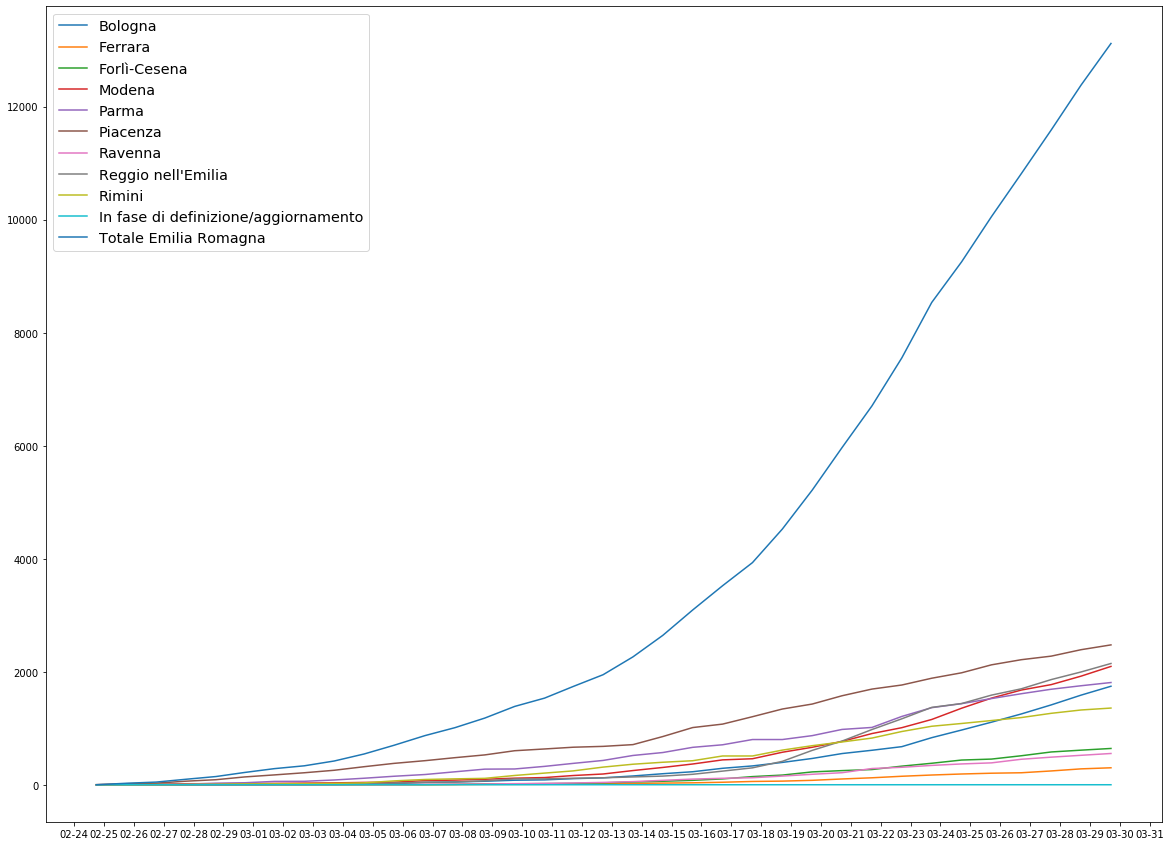

In [157]:
plot_region(df, "Emilia Romagna")

# Andamento Veneto

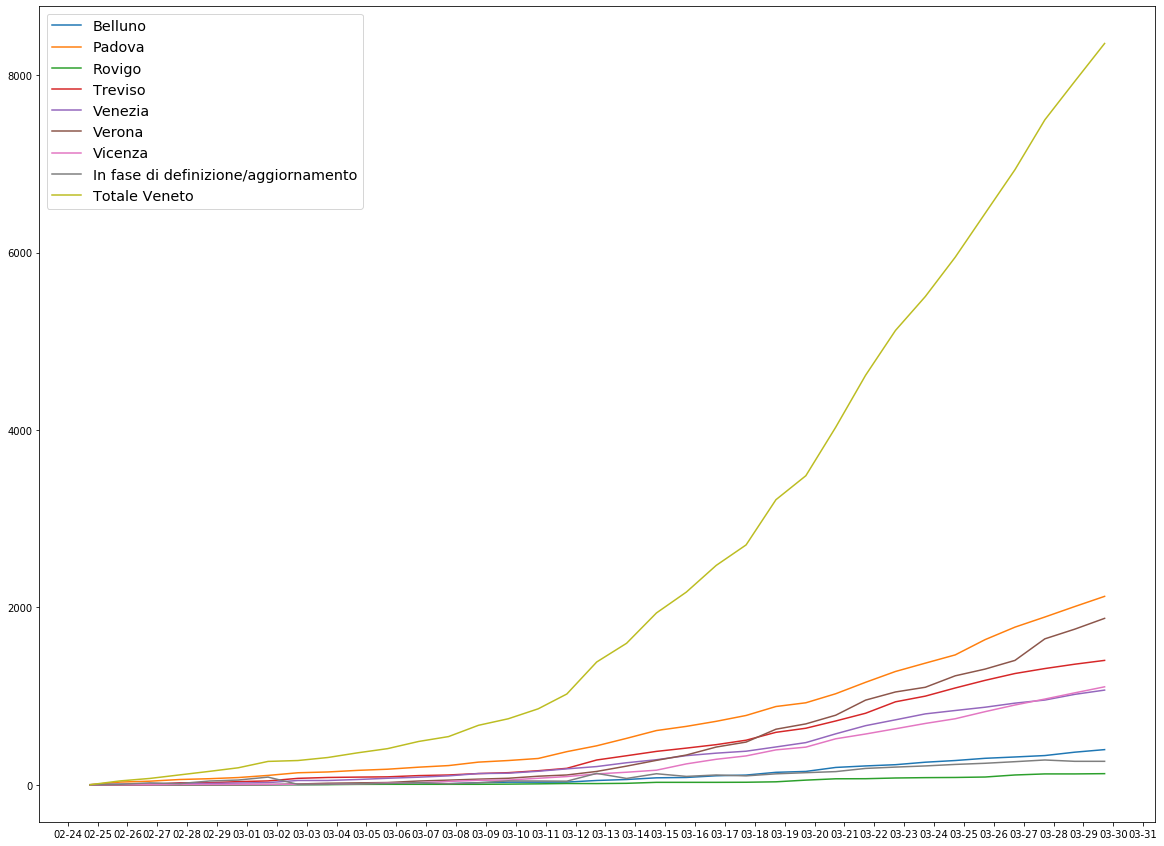

In [158]:
plot_region(df, "Veneto")

# Andamento Sardegna

In [159]:
df_province = (df[(df["data"] == df["data"].max()) & 
         (df["denominazione_regione"] == "Sardegna")][["denominazione_provincia", "totale_casi"]]
     )

In [160]:
df_province

,denominazione_provincia,totale_casi
4438,Cagliari,102
4439,Nuoro,57
4440,Oristano,9
4441,Sassari,415
4442,Sud Sardegna,55
4443,In fase di definizione/aggiornamento,0


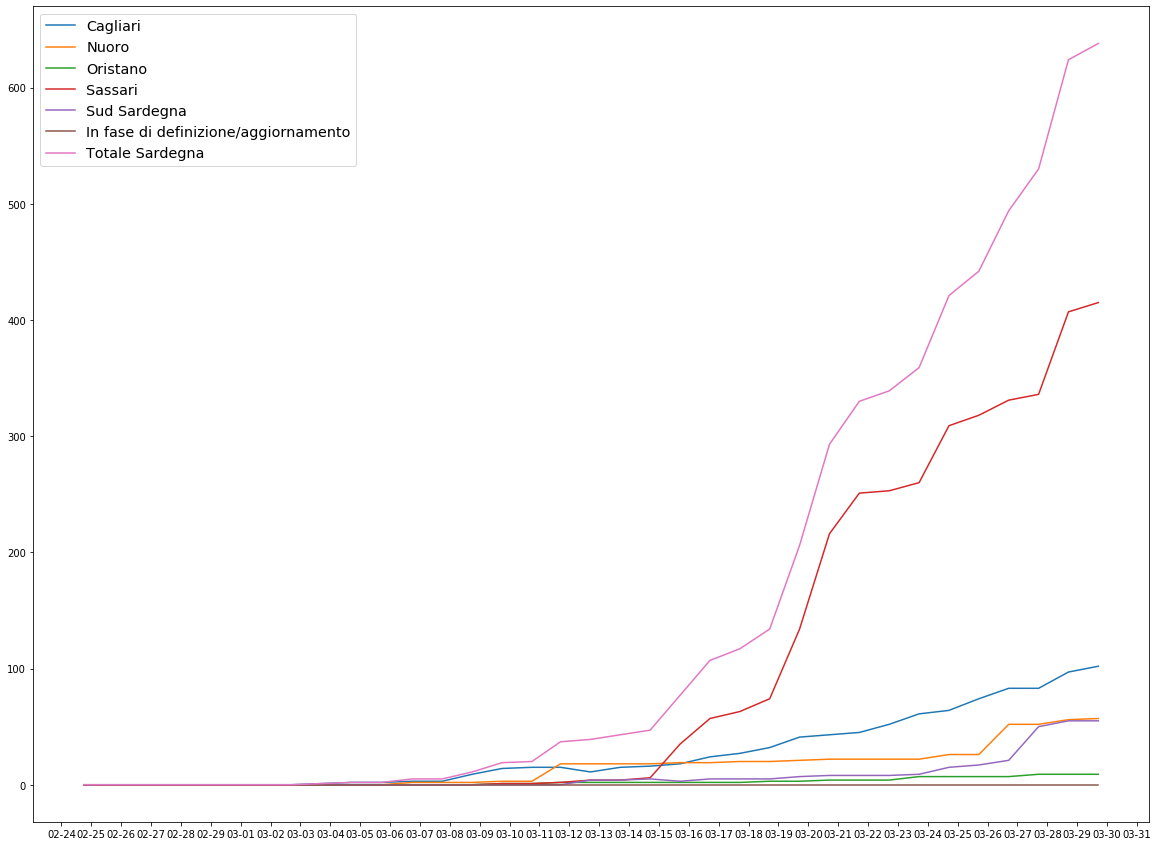

In [161]:
plot_region(df, "Sardegna")